# Задание 5

In [1]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from typing import Callable
import pandas as pd
from random import uniform as rnd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Получение многочлена Лежандра

In [19]:
def get_Legendre(n: int) -> Callable:
    a = lambda x: 1.
    if n == 0:
        return a
    b = lambda x: x
    if n == 1:
        return b
    for k in range(2, n + 1):
        a, b = b, (lambda f1, f2: (lambda x: f1(x) * x * (2 * k - 1) / k - f2(x) * (k - 1) / k))(b, a)
    return b

### Получение корней методом секущих

In [3]:
eps = 1.e-12
def secant_method(f: Callable) -> np.ndarray:
    segments = []

    def get_partition(n: float, a: float, b: float) -> None:
        h = (b - a) / n
        left = a
        for i in range(int(n)):
            right = a + (i + 1) * h
            if f(left) * f(right) < 0:
                segments.append([left, right])
            if f(right) != 0:
                left = right

    get_partition(1.e3, -1, 1)

    def get_random(a: float, b: float) -> float:
        x = rnd(a, b)
        while x == a or x == b:
            x = rnd(a, b)
        return x

    def pure_secants(s: list[float]) -> float:
        x0 = s[0]
        x1 = get_random(x0, s[1])
        x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)
        while abs(x2 - x1) >= eps:
            x2, x1, x0 = x2 - (f(x2) / (f(x2) - f(x1))) * (x2 - x1), x2, x1
        return x2

    hubs = np.array([pure_secants(segment) for segment in segments])
    return hubs

### Получение коэффициентов КФ Гаусса

In [28]:
def get_gauss_coefficients(hub_list: np.ndarray, n: int) -> np.ndarray:
    Pn1 = get_Legendre(n - 1)
    # Pn = get_Legendre(n)
    # return np.array([2 * (1 - x**2) / (n * (Pn1(x) - x * Pn(x)))**2 for x in hub_list])
    return np.array([2 * (1 - x**2) / (n * Pn1(x))**2 for x in hub_list])

#### Вывод узлов и коэффициентов для КФ Гаусса

In [29]:
def get_hubs_coefficients(n: int) -> pd.DataFrame:
    dfs = {}
    for i in range(1, n + 1):
        P = get_Legendre(i)
        hubs = secant_method(P)
        coefficients = get_gauss_coefficients(hubs, i)
        hubs = np.append(hubs, np.array(['_' for _ in range(n - i)]))
        coefficients = np.append(coefficients, np.array(['_' for _ in range(n - i)]))
        dfs[f"Узлы для N = {i}"] = hubs
        dfs[f"Коэффициенты для N = {i}"] = coefficients
    return pd.DataFrame(dfs, index=[f"X{i+1}" for i in range(n)])

N = 10
df = get_hubs_coefficients(N)
df

,Узлы для N = 1,Коэффициенты для N = 1,Узлы для N = 2,Коэффициенты для N = 2,Узлы для N = 3,Коэффициенты для N = 3,Узлы для N = 4,Коэффициенты для N = 4,Узлы для N = 5,Коэффициенты для N = 5,Узлы для N = 6,Коэффициенты для N = 6,Узлы для N = 7,Коэффициенты для N = 7,Узлы для N = 8,Коэффициенты для N = 8,Узлы для N = 9,Коэффициенты для N = 9,Узлы для N = 10,Коэффициенты для N = 10
X1,0.0,2.0,-0.5773502691896257,1.0000000000000002,-0.8,0.37807183364839275,-0.8857744071657502,0.2127196227127349,-0.9265671357988284,0.13724847717388688,-0.9489458607285938,0.09602919197166995,-0.962492261216492,0.07098627988052662,-0.9712972103704755,0.05461861259452316,-0.9773359881271343,0.04332967445214241,-0.981655,0.035214
X2,_,_,0.5773502691896257,1.0000000000000002,0.0,0.8888888888888888,-0.3657472440756585,0.409347011511788,-0.5715404867922662,0.2403676620926715,-0.6937693926549012,0.1596285009415841,-0.771134844613336,0.11420182617687401,-0.822844806105977,0.08593084820127606,-0.8589819931529346,0.06707808389937894,-0.885173,0.053852
X3,_,_,_,_,0.8,0.37807183364839275,0.3657472440756585,0.409347011511788,-6.310887241768095e-30,0.2528395061728395,-0.2539030818183485,0.16878201239892615,-0.4279038564395623,0.12066657742480338,-0.549764178769419,0.09065531612512998,-0.6375204458809617,0.07066054557709191,-0.702443,0.056656
X4,_,_,_,_,_,_,0.8857744071657502,0.2127196227127349,0.5715404867922661,0.24036766209267169,0.2539030818183485,0.16878201239892615,0.0,0.12187689795918363,-0.19304792651809502,0.0918191501116345,-0.33921210887382547,0.07162953696847787,-0.450990,0.057446
X5,_,_,_,_,_,_,_,_,0.9265671357988284,0.13724847717388688,0.6937693926549013,0.15962850094158385,0.4279038564395623,0.12066657742480338,0.19304792651809502,0.0918191501116345,-4.591774807899561e-41,0.07185889797645752,-0.155400,0.057703
X6,_,_,_,_,_,_,_,_,_,_,0.9489458607285938,0.09602919197166995,0.7711348446133361,0.11420182617687381,0.549764178769419,0.09065531612512998,0.33921210887382547,0.07162953696847787,0.155400,0.057703
X7,_,_,_,_,_,_,_,_,_,_,_,_,0.962492261216492,0.07098627988052662,0.822844806105977,0.08593084820127606,0.6375204458809618,0.0706605455770918,0.450990,0.057446
X8,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.9712972103704756,0.05461861259451984,0.8589819931529346,0.06707808389937894,0.702443,0.056656
X9,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.9773359881271343,0.04332967445214241,0.885173,0.053852
X10,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,0.981655,0.035214


#### Реализация КФ Гаусса

In [32]:
def gauss(f: Callable, a: float, b: float, n: int) -> float:
    legendre = get_Legendre(n)
    hub_list = np.array([(a + b + (b - a) * t) / 2 for t in secant_method(legendre)])
    coefficients = get_gauss_coefficients(hub_list, n)
    S = sum([coefficients[i] * f(hub_list[i]) for i in range(len(hub_list))])
    return (b - a) * S / 2

In [34]:
pol = lambda x: 1 + 3 * x**2
integral = lambda x: x + x**3
left = -2
right = 2
print(integral(right) - integral(left), gauss(pol, left, right, 4))

20 13.25218463285106


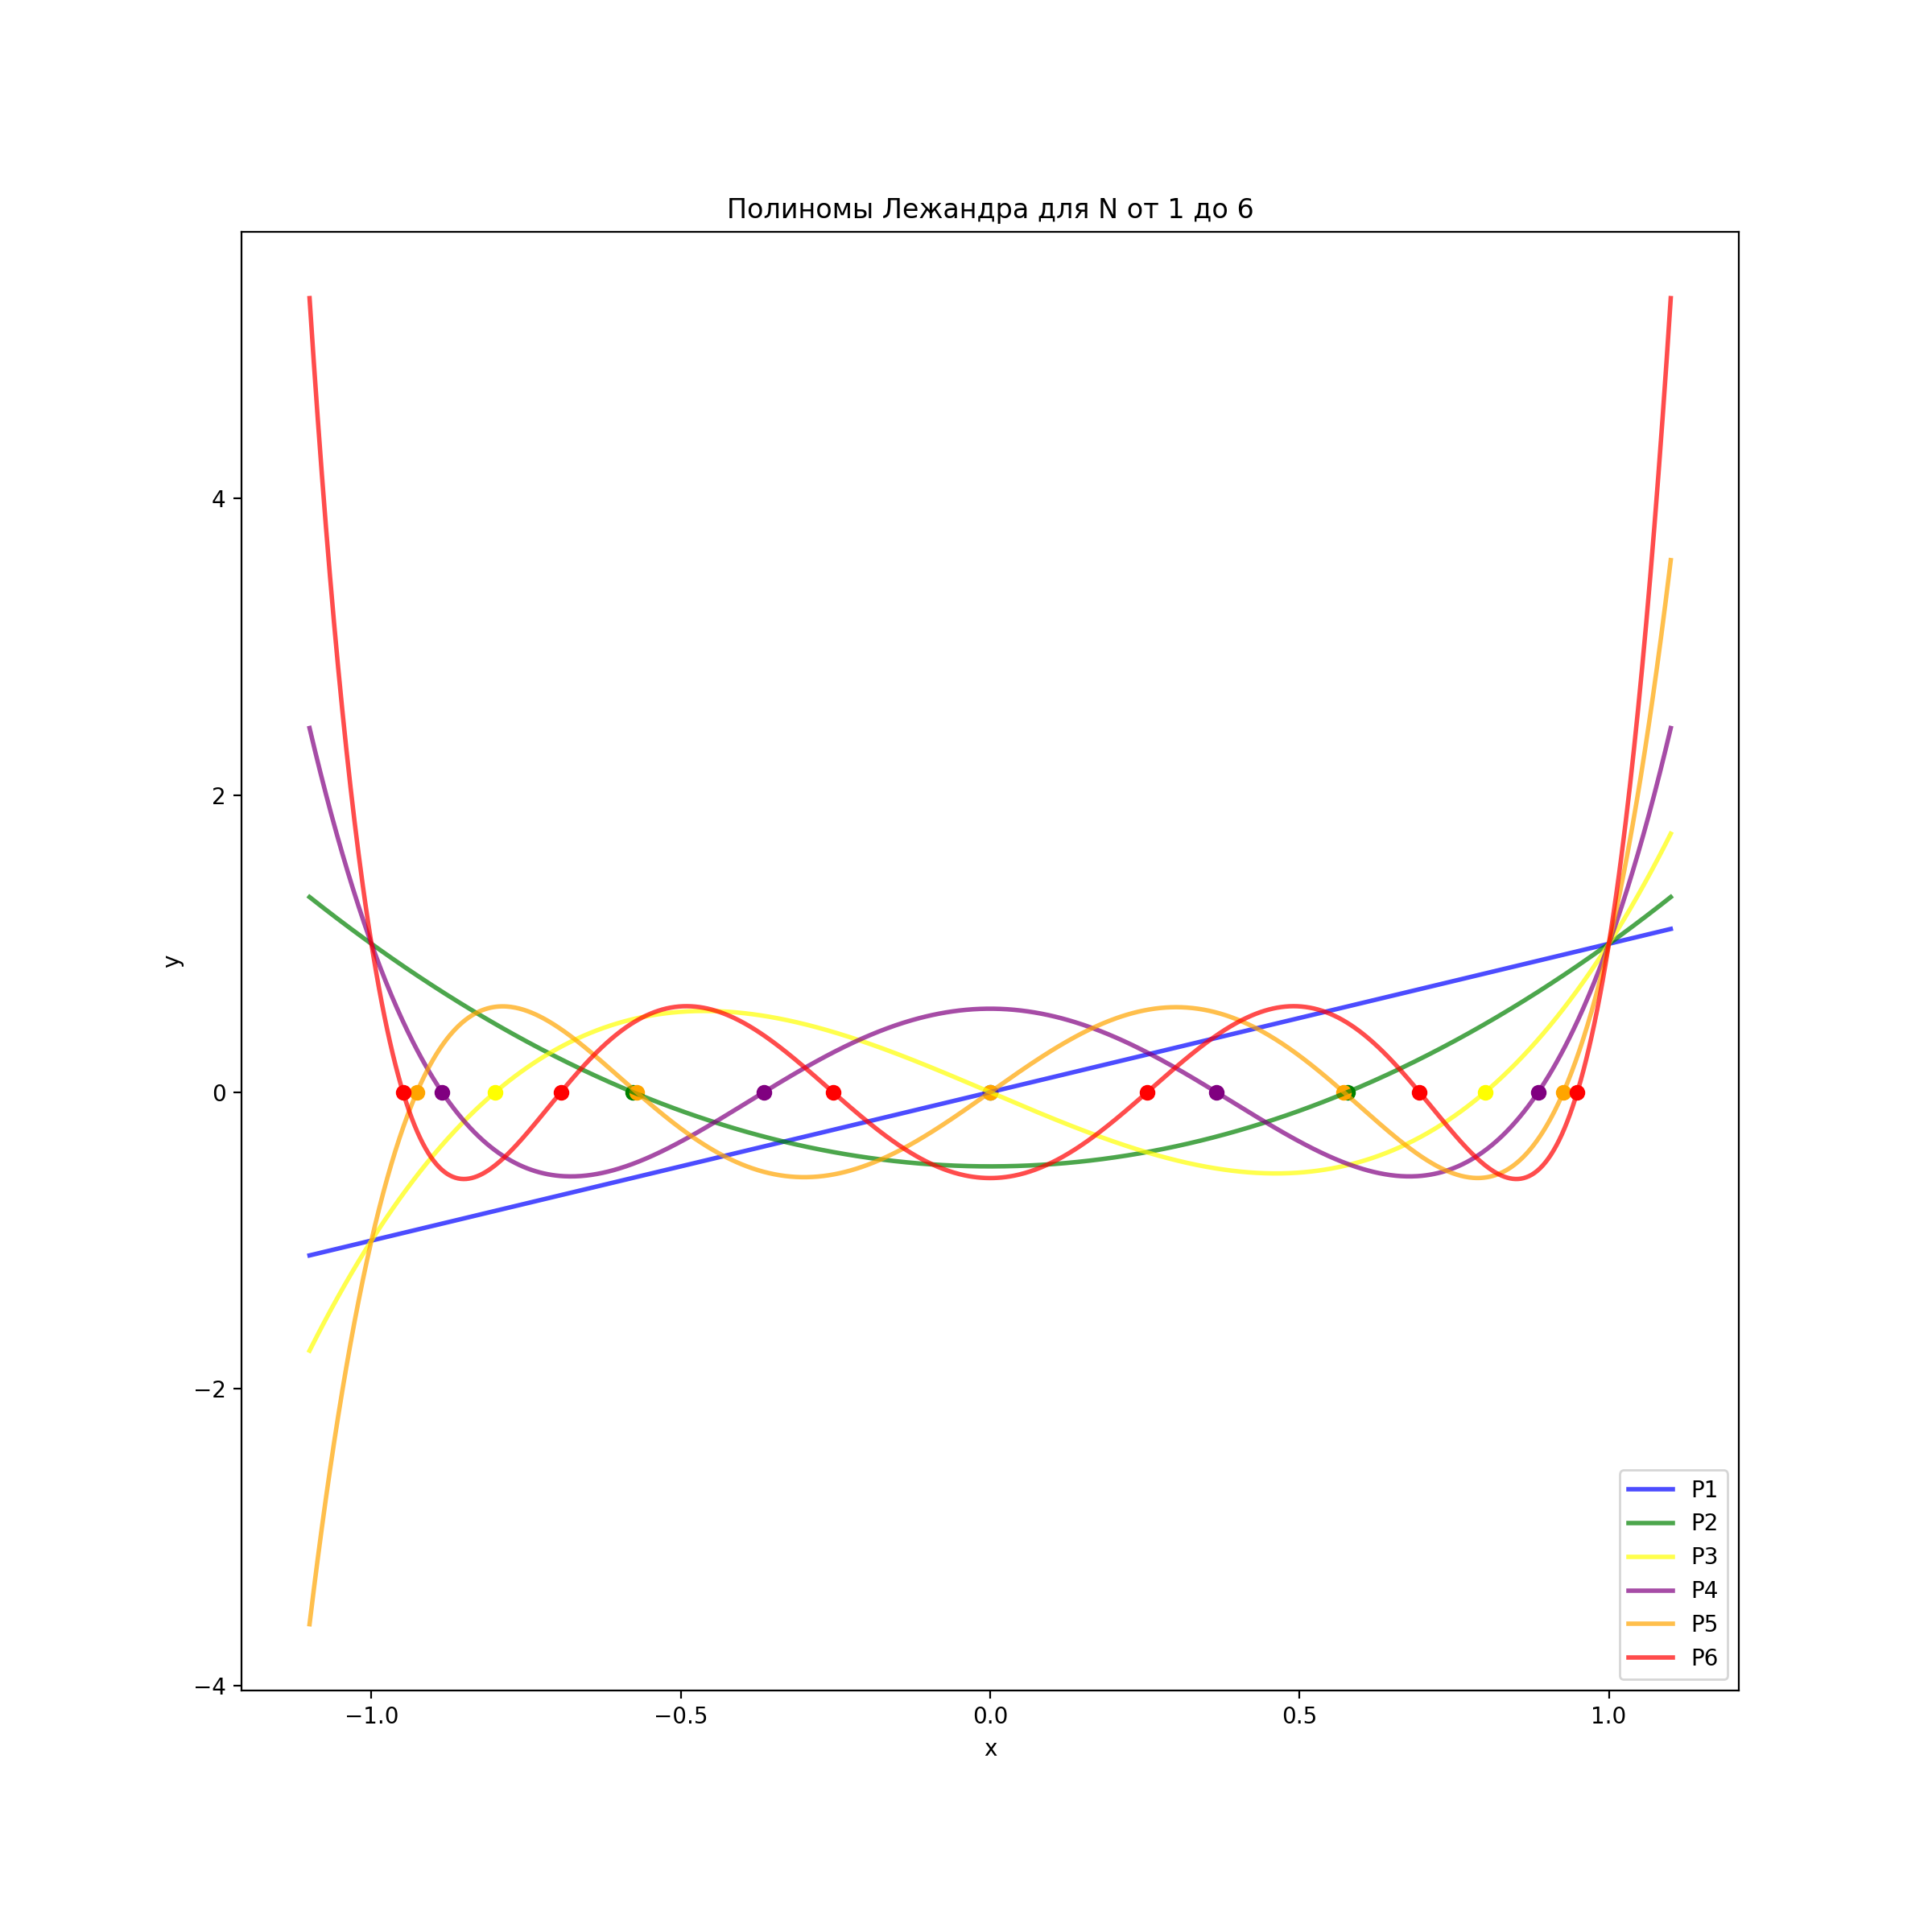

In [18]:
def show_graph(n: int) -> None:
    pts = 1000
    delta = 1.e-1
    X = np.linspace(-1 - delta, 1 + delta, pts)
    starter = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    colours = [color for color in starter]
    i = 0
    while len(colours) <= n:
        colours.append(starter[i])
        i = (i + 1) % len(starter)

    fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
    for i in range(n):
        f = get_Legendre(i + 1)
        hubs = secant_method(f)
        ax.plot(X, [f(x) for x in X], color=colours[i + 1], alpha=0.7, label=f"P{i + 1}", linewidth=2)
        [ax.scatter(hub, 0, c=colours[i + 1]) for hub in hubs]
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f'Полиномы Лежандра для N от {1} до {n}')
    ax.legend()

    plt.show()

show_graph(6)